In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load dataset
df = pd.read_csv("diabetes.csv")


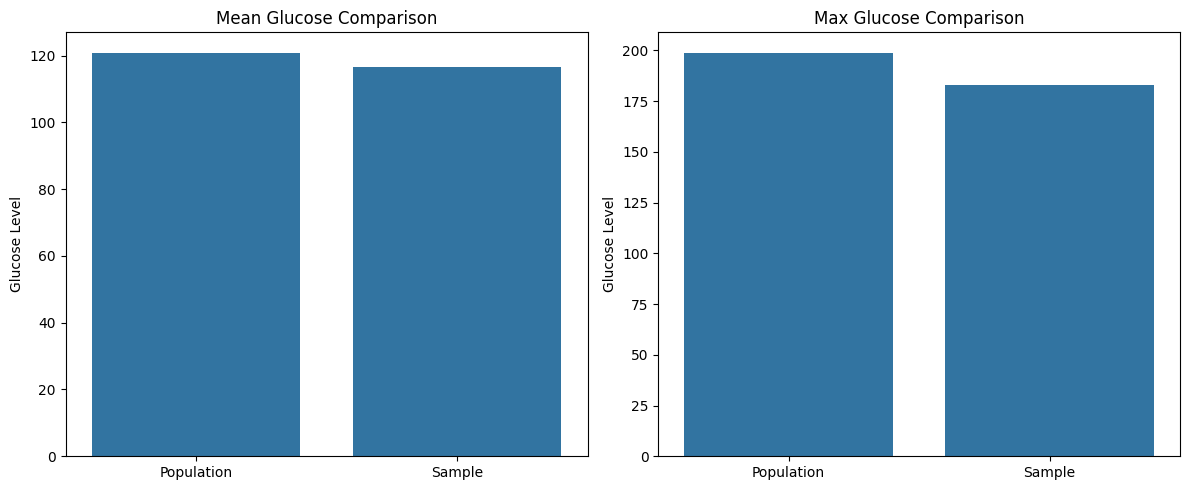

In [14]:


# Task (a): Sample 25 patients and compare Glucose stats with population
np.random.seed(42)
sample_25 = df.sample(n=25, random_state=42)

# Compute Glucose statistics
population_mean_glucose = df["Glucose"].mean()
population_max_glucose = df["Glucose"].max()
sample_mean_glucose = sample_25["Glucose"].mean()
sample_max_glucose = sample_25["Glucose"].max()

# Plot mean and max Glucose comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=["Population", "Sample"], y=[population_mean_glucose, sample_mean_glucose])
plt.title("Mean Glucose Comparison")
plt.ylabel("Glucose Level")

plt.subplot(1, 2, 2)
sns.barplot(x=["Population", "Sample"], y=[population_max_glucose, sample_max_glucose])
plt.title("Max Glucose Comparison")
plt.ylabel("Glucose Level")

plt.tight_layout()
plt.show()



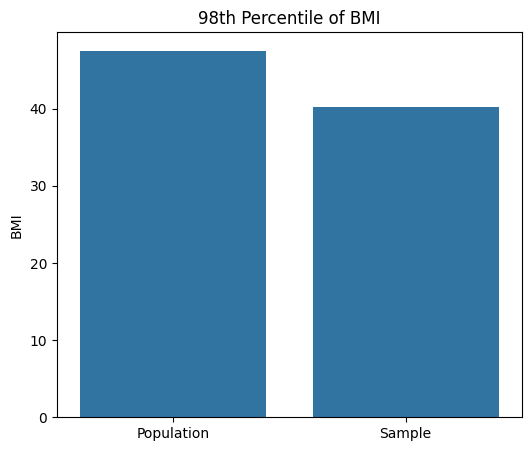

In [15]:
# Task (b): Compare 98th percentile of BMI in sample vs population
population_98_bmi = np.percentile(df["BMI"], 98)
sample_98_bmi = np.percentile(sample_25["BMI"], 98)

# Plot BMI 98th percentile comparison
plt.figure(figsize=(6, 5))
sns.barplot(x=["Population", "Sample"], y=[population_98_bmi, sample_98_bmi])
plt.title("98th Percentile of BMI")
plt.ylabel("BMI")
plt.show()


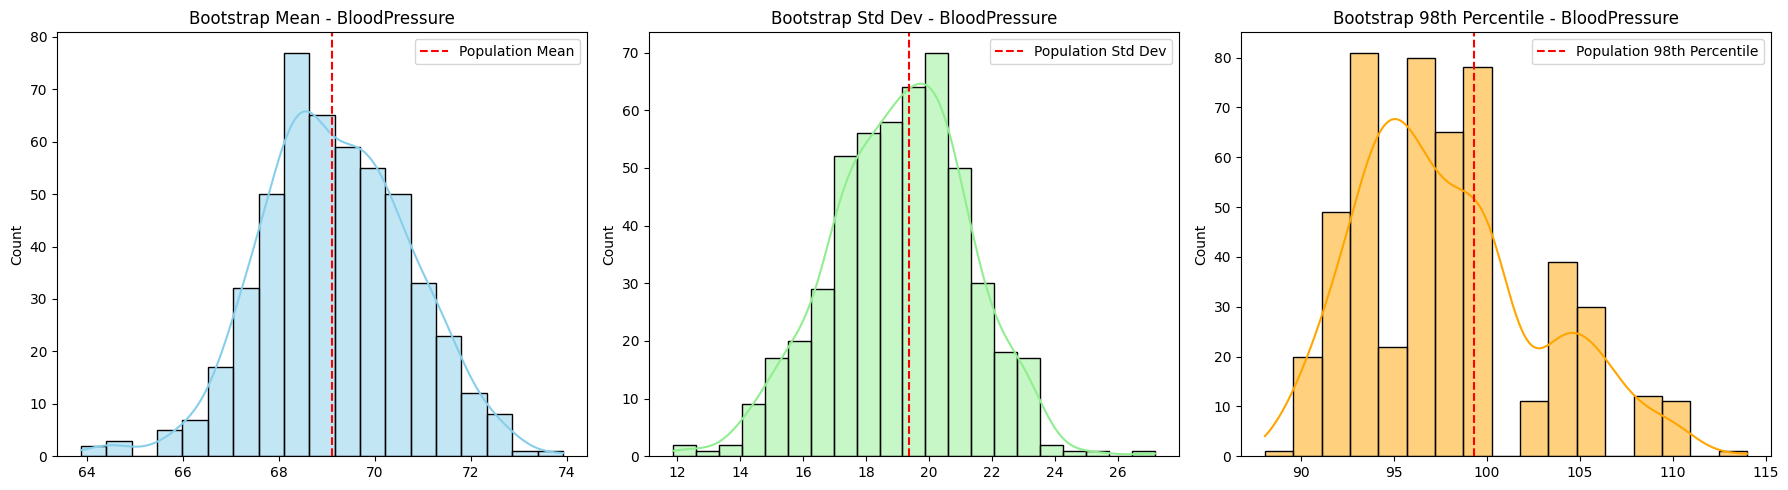

In [16]:

# Task (c): Bootstrap for BloodPressure (500 samples of size 150)
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    bootstrap_sample = df.sample(n=150, replace=True)
    bp = bootstrap_sample["BloodPressure"]
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_percentiles.append(np.percentile(bp, 98))

# Calculate population BloodPressure stats
pop_mean_bp = df["BloodPressure"].mean()
pop_std_bp = df["BloodPressure"].std()
pop_98_bp = np.percentile(df["BloodPressure"], 98)

# Plot bootstrap distributions vs population
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(bootstrap_means, kde=True, color="skyblue")
plt.axvline(pop_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.title("Bootstrap Mean - BloodPressure")
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(bootstrap_stds, kde=True, color="lightgreen")
plt.axvline(pop_std_bp, color='red', linestyle='--', label='Population Std Dev')
plt.title("Bootstrap Std Dev - BloodPressure")
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(bootstrap_percentiles, kde=True, color="orange")
plt.axvline(pop_98_bp, color='red', linestyle='--', label='Population 98th Percentile')
plt.title("Bootstrap 98th Percentile - BloodPressure")
plt.legend()

plt.tight_layout()
plt.show()
